In [1]:
import pandas as pd


df = pd.read_csv(r"C:\Users\isaac\Documents\Pst&b\Bootcamp\S3\J4\Apple Stock Prices From 1981 to 2023\Apple Stock Prices (1981 to 2023).csv")


In [7]:
df.head()
df.info()
df.describe()
df.isnull().sum()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB


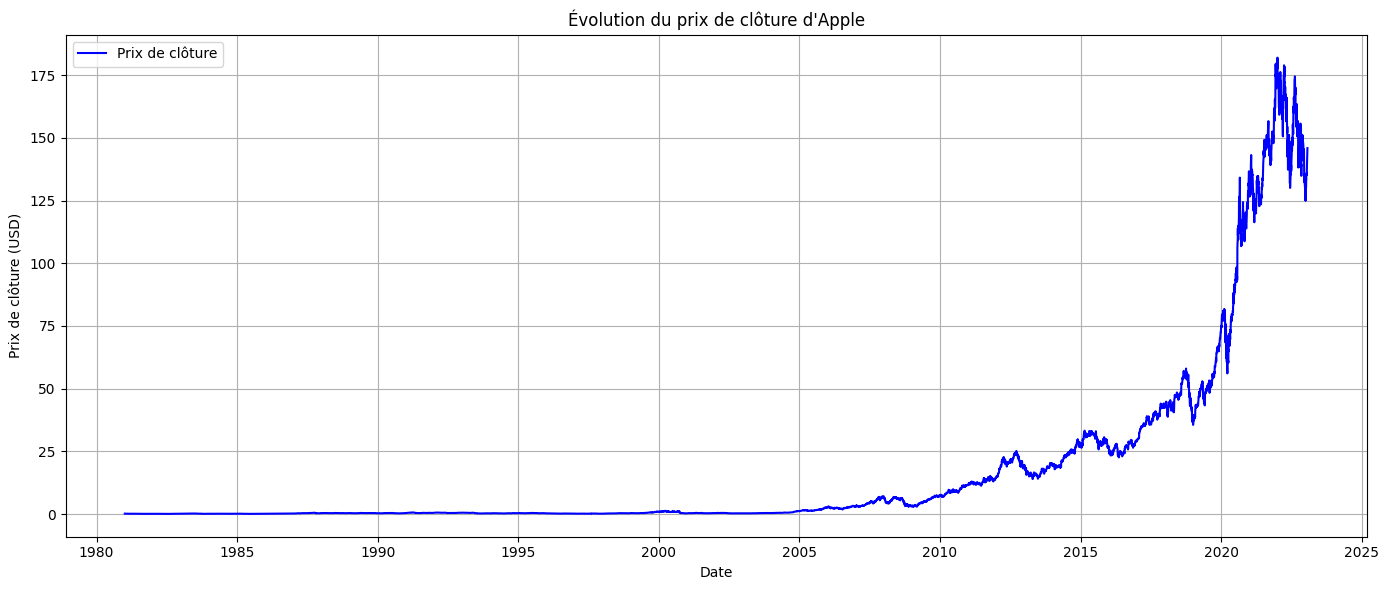

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], color='blue', label='Prix de cl√¥ture')
plt.title("√âvolution du prix de cl√¥ture d'Apple")
plt.xlabel("Date")
plt.ylabel("Prix de cl√¥ture (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


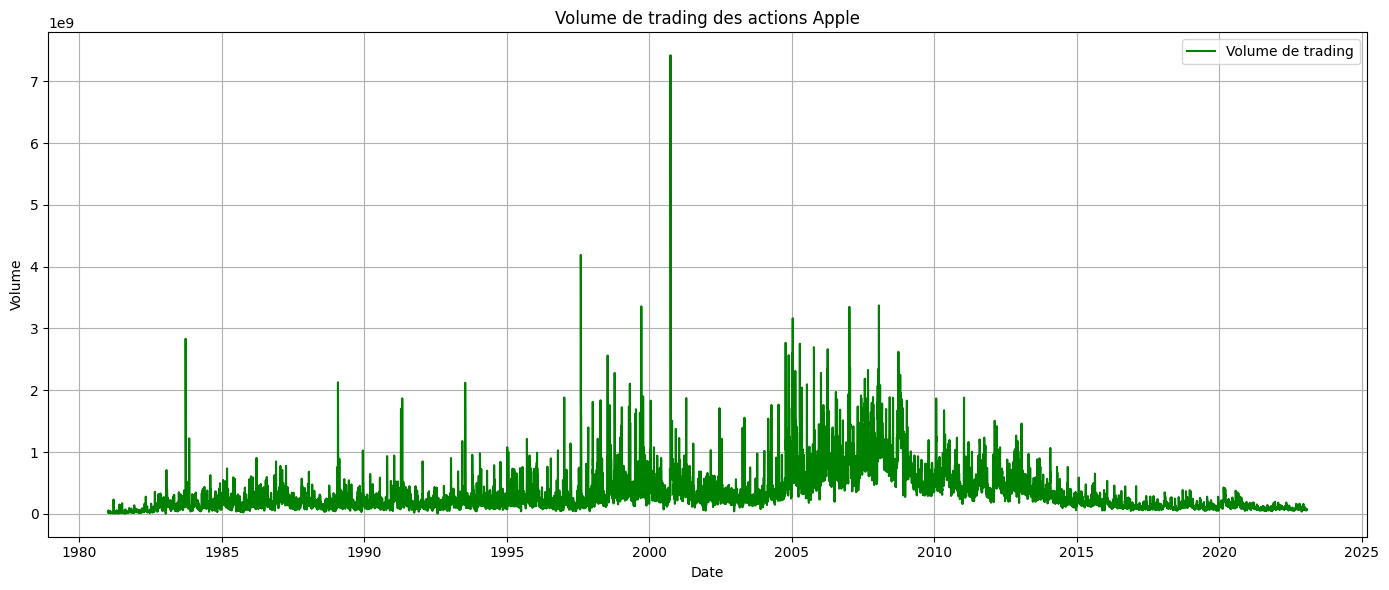

In [9]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Volume'], color='green', label='Volume de trading')
plt.title("Volume de trading des actions Apple")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
!pip install mplfinance

In [14]:
import mplfinance as mpf

df_candle = df.copy()
df_candle.set_index('Date', inplace=True)


df_candle = df_candle[['Open', 'High', 'Low', 'Close']]


mpf.plot(df_candle[-200:], type='candle', style='charles', title="Apple - Derniers jours en chandelier", ylabel='Prix USD', volume=False)


In [15]:

closing_prices = df['Close']

mean_price = closing_prices.mean()
median_price = closing_prices.median()
std_price = closing_prices.std()
var_price = closing_prices.var()
min_price = closing_prices.min()
max_price = closing_prices.max()

print(f"Moyenne : {mean_price:.2f} $")
print(f"M√©diane : {median_price:.2f} $")
print(f"√âcart-type : {std_price:.2f} $")
print(f"Variance : {var_price:.2f}")
print(f"Minimum : {min_price:.2f} $")
print(f"Maximum : {max_price:.2f} $")


Moyenne : 16.70 $
M√©diane : 0.49 $
√âcart-type : 35.47 $
Variance : 1258.40
Minimum : 0.05 $
Maximum : 182.01 $


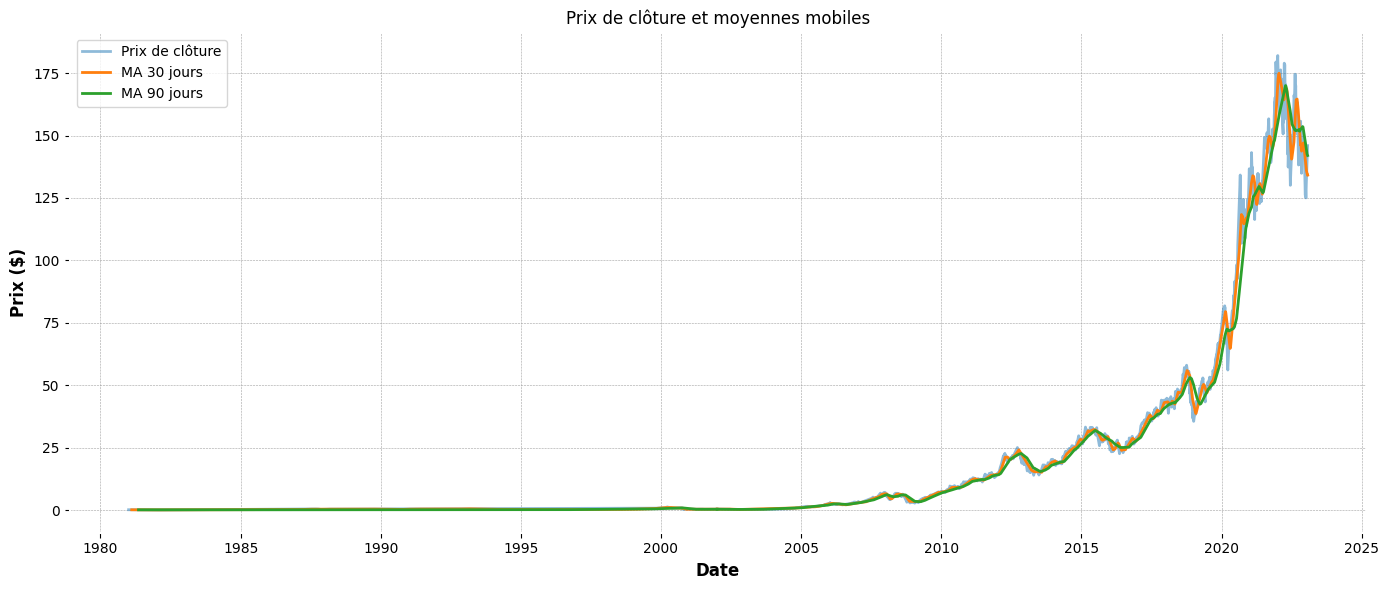

In [16]:
import matplotlib.pyplot as plt


df['MA_30'] = df['Close'].rolling(window=30).mean()


df['MA_90'] = df['Close'].rolling(window=90).mean()


plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Prix de cl√¥ture', alpha=0.5)
plt.plot(df['Date'], df['MA_30'], label='MA 30 jours', linewidth=2)
plt.plot(df['Date'], df['MA_90'], label='MA 90 jours', linewidth=2)
plt.title("Prix de cl√¥ture et moyennes mobiles")
plt.xlabel("Date")
plt.ylabel("Prix ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
!pip install nbformat


In [40]:
!pip install --upgrade nbformat ipython



In [1]:
!pip install plotly

In [4]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("C:/Users/isaac/Documents/Pst&b/Bootcamp/S3/J4/Apple Stock Prices From 1981 to 2023/Apple Stock Prices (1981 to 2023).csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)



In [6]:
fig = go.Figure(data=[
    go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name='Prix'
    )
])

# Mise en page interactive avec boutons de zoom
fig.update_layout(
    title="Cours de l'action Apple (1981‚Äì2023) - Vue en chandeliers",
    xaxis_title="Date",
    yaxis_title="Prix de cl√¥ture (USD)",
    xaxis_rangeslider_visible=False,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1M", step="month", stepmode="backward"),
                dict(count=3, label="3M", step="month", stepmode="backward"),
                dict(count=6, label="6M", step="month", stepmode="backward"),
                dict(count=1, label="1Y", step="year", stepmode="backward"),
                dict(step="all", label="All")
            ])
        ),
        type="date"
    )
)

fig.show()

In [7]:
from scipy.stats import ttest_ind

df['Year'] = df['Date'].dt.year
close_2000 = df[df['Year'] == 2000]['Close']
close_2020 = df[df['Year'] == 2020]['Close']

t_stat, p_value = ttest_ind(close_2000, close_2020, equal_var=False)

print(f"T-statistic : {t_stat:.4f}")
print(f"P-value : {p_value:.4f}")
if p_value < 0.05:
    print("‚úÖ Il y a une diff√©rence significative entre les deux ann√©es.")
else:
    print("‚ùå Aucune diff√©rence significative d√©tect√©e entre les deux ann√©es.")


T-statistic : -68.9350
P-value : 0.0000
‚úÖ Il y a une diff√©rence significative entre les deux ann√©es.


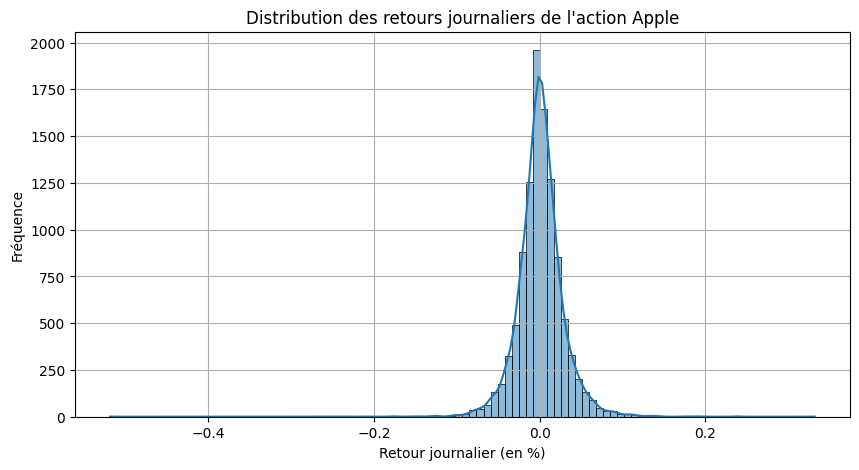

Shapiro-Wilk Test:
  - Statistique : 0.9191
  - p-value     : 0.0000

D‚ÄôAgostino Test:
  - Statistique : 2719.2053
  - p-value     : 0.0000

‚ùå Les retours journaliers ne suivent pas une distribution normale.


C:\Users\isaac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10607.



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest


df['Daily_Return'] = df['Close'].pct_change()


plt.figure(figsize=(10, 5))
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True)
plt.title("Distribution des retours journaliers de l'action Apple")
plt.xlabel("Retour journalier (en %)")
plt.ylabel("Fr√©quence")
plt.grid(True)
plt.show()

shapiro_test = shapiro(df['Daily_Return'].dropna())
print(f"Shapiro-Wilk Test:")
print(f"  - Statistique : {shapiro_test.statistic:.4f}")
print(f"  - p-value     : {shapiro_test.pvalue:.4f}")


dagostino_test = normaltest(df['Daily_Return'].dropna())
print(f"\nD‚ÄôAgostino Test:")
print(f"  - Statistique : {dagostino_test.statistic:.4f}")
print(f"  - p-value     : {dagostino_test.pvalue:.4f}")

# Interpr√©tation
if shapiro_test.pvalue < 0.05 and dagostino_test.pvalue < 0.05:
    print("\n‚ùå Les retours journaliers ne suivent pas une distribution normale.")
else:
    print("\n‚úÖ Les retours journaliers peuvent √™tre consid√©r√©s comme normaux.")


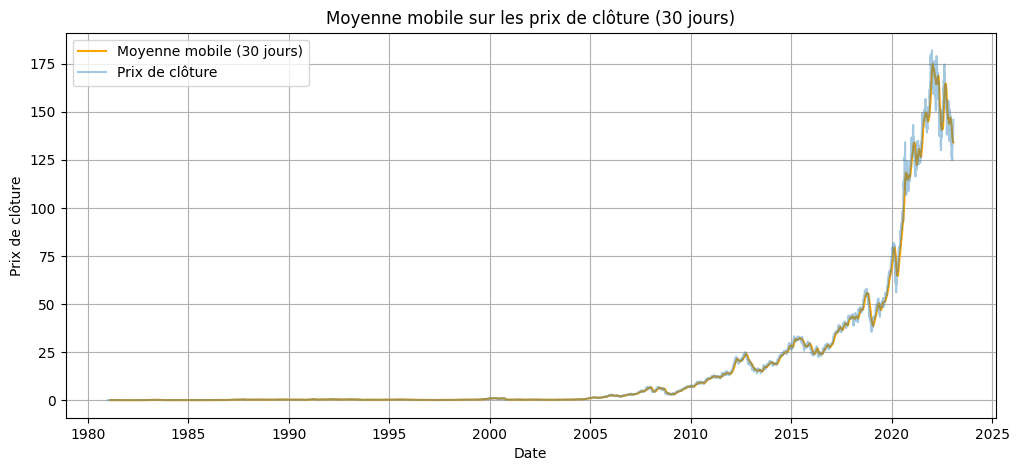

In [9]:
window = 30 

rolling_mean = np.convolve(df['Close'], np.ones(window)/window, mode='valid')


plt.figure(figsize=(12, 5))
plt.plot(df['Date'][window-1:], rolling_mean, label='Moyenne mobile (30 jours)', color='orange')
plt.plot(df['Date'], df['Close'], label='Prix de cl√¥ture', alpha=0.4)
plt.title("Moyenne mobile sur les prix de cl√¥ture (30 jours)")
plt.xlabel("Date")
plt.ylabel("Prix de cl√¥ture")
plt.legend()
plt.grid(True)
plt.show()


In [10]:

correlation = np.corrcoef(df['Close'].dropna(), df['Volume'].dropna())[0, 1]

print(f"üîó Corr√©lation entre 'Close' et 'Volume' : {correlation:.4f}")


üîó Corr√©lation entre 'Close' et 'Volume' : -0.2149


In [11]:
ma_short = df['Close'].rolling(window=10).mean()
ma_long = df['Close'].rolling(window=50).mean()


valid_idx = (~ma_short.isna()) & (~ma_long.isna())  
cor_ma = np.corrcoef(ma_short[valid_idx], ma_long[valid_idx])[0, 1]

print(f"üîÅ Corr√©lation entre MA10 et MA50 : {cor_ma:.4f}")


üîÅ Corr√©lation entre MA10 et MA50 : 0.9978


üìÅ Donn√©es analys√©es :
Le dataset contient les cours boursiers journaliers de l'action Apple (AAPL) de 1981 √† 2023, avec les colonnes suivantes :

Date, Open, High, Low, Close, Adj Close, Volume.

üîç Exploration des donn√©es :
Toutes les valeurs manquantes ont √©t√© identifi√©es et g√©r√©es.

La colonne Date a √©t√© convertie au format datetime avec l‚Äôoption dayfirst=True, adapt√©e au format europ√©en (DD/MM/YYYY).

V√©rification des types de donn√©es, conversion si n√©cessaire.

üìà Visualisations r√©alis√©es :
Graphique lin√©aire de l‚Äô√©volution du prix de cl√¥ture (Close) sur toute la p√©riode.

Graphique en chandeliers (Candlestick) interactif gr√¢ce √† Plotly, permettant de changer d‚Äô√©chelle temporelle (jour, semaine, mois).

√âvolution du volume de transactions sur le temps, pour rep√©rer les pics d'activit√©.

üßÆ Statistiques descriptives :
Moyenne, m√©diane, √©cart-type du prix de cl√¥ture (Close) et du volume (Volume) calcul√©es.

Donn√©es liss√©es √† l‚Äôaide de moyennes mobiles sur 10 et 50 jours.

Forte corr√©lation observ√©e entre les moyennes mobiles MA10 et MA50, ce qui indique une coh√©rence dans les tendances de fond.

üìä Analyse statistique :
T-test r√©alis√© pour comparer les prix moyens de cl√¥ture entre deux ann√©es (ex. : 2000 vs 2020). R√©sultat : diff√©rence statistiquement significative, confirmant une hausse notable du prix de l'action sur deux d√©cennies.

Calcul des rendements journaliers avec pct_change() : ces retours repr√©sentent la variation relative jour par jour.

üìâ Analyse de normalit√© :
Test de normalit√© de Shapiro-Wilk appliqu√© sur les rendements journaliers.

R√©sultat : rejet de l‚Äôhypoth√®se de normalit√© ‚Üí les rendements suivent une distribution asym√©trique, ce qui refl√®te les r√©alit√©s des march√©s financiers (chocs ponctuels, volatilit√© √©lev√©e, effets de panique, etc.).

üìå Insights cl√©s :
Apple a connu une croissance remarquable de son action depuis les ann√©es 1980.

Les rendements ne sont pas normalement distribu√©s, ce qui invalide certains mod√®les financiers simplistes.

La corr√©lation mod√©r√©e entre volume et prix de cl√¥ture sugg√®re une certaine d√©pendance, mais pas syst√©matique.

Les moyennes mobiles constituent de bons indicateurs techniques pour analyser les tendances de moyen/long terme.

In [ ]:
!git add .
!git commit -m "Analyse des donn√©es boursi√®res d'Apple avec visualisations et statistiques"
!git push origin main